In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
dataset_filename = "../../ReportData/combined_variables_dataset_normalized.csv"
dataset_original_filename = "../../ReportData/combined_variables_dataset.csv"
dataset_bioclim_filename = "D:\Masters\Data\coords_with_bioclim_30s_fixed.csv"

In [3]:
# print(os.getcwd())
dataset = pd.read_csv(dataset_filename)
dataset_original = pd.read_csv(dataset_original_filename)
dataset_bioclim = pd.read_csv(dataset_bioclim_filename).dropna() # drop rows with NaN values

In [ ]:
bio11_6_col = dataset_original["BIO_11_6"]
# remove sentinel invalid values and NaNs
bio11_6_col = bio11_6_col[bio11_6_col != -3.4e+38].dropna()
bio1_mean = bio11_6_col.mean()
bio1_std = bio11_6_col.std()
print(f"BIO_11_6 mean: {bio1_mean}, BIO_11_6 std: {bio1_std}")

BIO_11_6 mean: 7.137872231380002e-17, BIO_11_6 std: 0.9954398931261679


In [5]:
bio11_col = dataset_bioclim["BIO11"]
bio11_col = bio11_col[bio11_col != -3.4e+38]
bio11_mean = bio11_col.dropna().mean()
bio11_std = bio11_col.dropna().std()
print(f"BIO11 mean: {bio11_mean}, BIO11 std: {bio11_std}")

bio6_col = dataset_bioclim["BIO6"]
bio6_col = bio6_col[bio6_col != -3.4e+38]
bio6_mean = bio6_col.dropna().mean()
bio6_std = bio6_col.dropna().std()
print(f"BIO6 mean: {bio6_mean}, BIO6 std: {bio6_std}")

BIO11 mean: 0.4811523752847038, BIO11 std: 5.114668124222567
BIO6 mean: -3.762157382847038, BIO6 std: 5.560394104577262


In [6]:
bio11_col = dataset_bioclim["BIO10"]
bio11_col = bio11_col[bio11_col != -3.4e+38]
bio11_mean = bio11_col.dropna().mean()
bio11_std = bio11_col.dropna().std()
print(f"BIO10 mean: {bio11_mean}, BIO10 std: {bio11_std}")

bio6_col = dataset_bioclim["BIO5"]
bio6_col = bio6_col[bio6_col != -3.4e+38]
bio6_mean = bio6_col.dropna().mean()
bio6_std = bio6_col.dropna().std()
print(f"BIO5 mean: {bio6_mean}, BIO5 std: {bio6_std}")

BIO10 mean: 18.054391409425286, BIO10 std: 3.1499700884555715
BIO5 mean: 24.585676392572946, BIO5 std: 3.897930918983539


In [7]:
bio1_column = dataset["BIO1"]
bio1_column = bio1_column.dropna()

print(f"10 rows with lowest bio1 values:\n{bio1_column.nsmallest(10)}")

10 rows with lowest bio1 values:
412    -5.886278
546    -5.886278
30     -3.821147
435    -3.530906
28     -3.452075
1077   -3.416243
29     -3.306358
862    -3.146307
1087   -2.932508
31     -2.387858
Name: BIO1, dtype: float64


In [8]:
val_ids_file = "../../Data/val_ids.txt"
train_ids_file = "../../Data/train_ids.txt"
with open(val_ids_file, "r") as f:
    val_ids = f.read().split()
with open(train_ids_file, "r") as f:
    train_ids = f.read().split()

joint_ids = set(val_ids).union(set(train_ids))

In [9]:
val_dataset = dataset[dataset["IID"].isin([int(val) for val in joint_ids])]
val_bio1_column = val_dataset["BIO1"]
print(f"10 rows with lowest BIO1 values in validation set:\n{val_bio1_column.nsmallest(10)}")
print(f"10 rows with the highest BIO1 values in validation set:\n{val_bio1_column.nlargest(10)}")

val_bio_11_6_column = val_dataset["BIO_11_6"]
print(f"10 rows with lowest BIO_11_6 values in validation set:\n{val_bio_11_6_column.nsmallest(10)}")
print(f"10 rows with the highest BIO_11_6 values in validation set:\n{val_bio_11_6_column.nlargest(10)}")

10 rows with lowest BIO1 values in validation set:
412    -5.886278
546    -5.886278
30     -3.821147
435    -3.530906
28     -3.452075
1077   -3.416243
29     -3.306358
862    -3.146307
1087   -2.932508
31     -2.387858
Name: BIO1, dtype: float64
10 rows with the highest BIO1 values in validation set:
983     2.736150
379     2.479352
381     2.345578
689     2.332440
834     2.330051
1018    2.254803
776     2.220165
835     2.173584
647     2.168806
966     2.161640
Name: BIO1, dtype: float64
10 rows with lowest BIO_11_6 values in validation set:
412    -4.732499
546    -4.732499
28     -3.843909
29     -3.830977
862    -3.813834
1087   -3.719599
30     -3.566358
757    -3.133279
752    -3.114602
730    -3.110578
Name: BIO_11_6, dtype: float64
10 rows with the highest BIO_11_6 values in validation set:
379     2.806300
983     2.004396
381     1.913216
1048    1.875094
386     1.867343
776     1.818779
643     1.793212
834     1.789862
644     1.785838
766     1.783725
Name: BIO_11_

In [10]:
# Find consensus extreme accessions across BIO1, BIO_11_6, and BIO_10_5
# Rank each accession by each variable, then find consensus extremes

# Check if BIO_10_5 column exists
if 'BIO_10_5' not in val_dataset.columns:
    print("WARNING: BIO_10_5 column not found in dataset. Available columns:", val_dataset.columns.tolist())
    temp_vars = ['BIO1', 'BIO_11_6']
else:
    temp_vars = ['BIO1', 'BIO_11_6', 'BIO_10_5']

print(f"Using temperature variables: {temp_vars}")

# Create a dataframe with IID and all temperature variables
temp_df = val_dataset[['IID'] + temp_vars].dropna()
print(f"\nAccessions with complete data: {len(temp_df)}")

# Compute rank for each variable (1 = lowest, higher = higher value)
rank_df = temp_df.copy()
for var in temp_vars:
    rank_df[f'{var}_rank'] = temp_df[var].rank(method='average')

# Compute average rank across all variables
rank_cols = [f'{var}_rank' for var in temp_vars]
rank_df['avg_rank'] = rank_df[rank_cols].mean(axis=1)

# Sort by average rank to find consensus extremes
rank_df_sorted = rank_df.sort_values('avg_rank')

# Get 10 lowest (coldest) and 10 highest (warmest)
consensus_low_10 = rank_df_sorted.head(10)
consensus_high_10 = rank_df_sorted.tail(10)

# Get 10 most average (closest to median rank)
median_rank = rank_df['avg_rank'].median()
rank_df['dist_from_median'] = (rank_df['avg_rank'] - median_rank).abs()
consensus_avg_10 = rank_df.nsmallest(10, 'dist_from_median')

print("\n" + "="*80)
print("CONSENSUS 10 COLDEST ACCESSIONS (across BIO1, BIO_11_6, BIO_10_5):")
print("="*80)
display_cols = ['IID'] + temp_vars + ['avg_rank']
print(consensus_low_10[display_cols].to_string(index=False))
print(f"\nIID list: {consensus_low_10['IID'].tolist()}")

print("\n" + "="*80)
print("CONSENSUS 10 WARMEST ACCESSIONS (across BIO1, BIO_11_6, BIO_10_5):")
print("="*80)
print(consensus_high_10[display_cols].to_string(index=False))
print(f"\nIID list: {consensus_high_10['IID'].tolist()}")

print("\n" + "="*80)
print(f"CONSENSUS 10 MOST AVERAGE ACCESSIONS (closest to median rank={median_rank:.1f}):")
print("="*80)
avg_display_cols = ['IID'] + temp_vars + ['avg_rank', 'dist_from_median']
print(consensus_avg_10[avg_display_cols].to_string(index=False))
print(f"\nIID list: {consensus_avg_10['IID'].tolist()}")

# Show individual rankings for the consensus extremes
print("\n" + "="*80)
print("DETAILED RANKINGS FOR CONSENSUS EXTREMES:")
print("="*80)
print("\nColdest 10 - Individual ranks:")
for var in temp_vars:
    print(f"  {var}: {consensus_low_10[f'{var}_rank'].tolist()}")

print("\nWarmest 10 - Individual ranks:")
for var in temp_vars:
    print(f"  {var}: {consensus_high_10[f'{var}_rank'].tolist()}")

print("\nMost Average 10 - Individual ranks:")
for var in temp_vars:
    print(f"  {var}: {consensus_avg_10[f'{var}_rank'].tolist()}")

Using temperature variables: ['BIO1', 'BIO_11_6', 'BIO_10_5']

Accessions with complete data: 900

CONSENSUS 10 COLDEST ACCESSIONS (across BIO1, BIO_11_6, BIO_10_5):
  IID      BIO1  BIO_11_6  BIO_10_5  avg_rank
 8424 -5.886278 -4.732499 -5.260919  1.500000
 7183 -5.886278 -4.732499 -5.260919  1.500000
  766 -3.821147 -3.566358 -2.718181  5.000000
  763 -3.452075 -3.843909 -1.882875  6.333333
  765 -3.306358 -3.830977 -1.596230 11.000000
10015 -3.416243 -2.781597 -2.805554 12.333333
 9766 -3.146307 -3.813834 -1.460671 15.000000
 7298 -3.530906 -1.840057 -4.470483 19.333333
  768 -2.387858 -2.366132 -1.781457 22.000000
 1552 -1.723768 -1.223177 -1.414602 50.666667

IID list: [8424, 7183, 766, 763, 765, 10015, 9766, 7298, 768, 1552]

CONSENSUS 10 WARMEST ACCESSIONS (across BIO1, BIO_11_6, BIO_10_5):
 IID     BIO1  BIO_11_6  BIO_10_5   avg_rank
9512 2.062504  1.785838  1.805775 882.000000
9879 2.161640  1.614983  1.949539 883.333333
9727 2.173584  1.673209  1.873793 884.000000
9515 2.1688

In [ ]:
# Temperature variable configuration used for denormalization and styling
# Clean helper removes sentinel invalids and NaNs

def _clean_series(series):
    try:
        return series[(series != -3.4e+38)].dropna()
    except Exception:
        return series.dropna()

try:
    # Compute stats from original dataset (filtered)
    bio1_clean = _clean_series(dataset_original['BIO1']) if 'BIO1' in dataset_original.columns else pd.Series(dtype=float)
    bio_11_6_clean = _clean_series(dataset_original['BIO_11_6']) if 'BIO_11_6' in dataset_original.columns else pd.Series(dtype=float)
    bio_10_5_clean = _clean_series(dataset_original['BIO_10_5']) if 'BIO_10_5' in dataset_original.columns else pd.Series(dtype=float)

    TEMP_VARS = {
        'BIO1': {
            'mean': float(bio1_clean.mean()) if not bio1_clean.empty else 0.0,
            'std': float(bio1_clean.std()) if not bio1_clean.empty else 1.0,
            'label': 'BIO1 (Annual Mean Temp)',
            'color': '#1f77b4'
        },
        'BIO_11_6': {
            'mean': float(bio_11_6_clean.mean()) if not bio_11_6_clean.empty else 0.0,
            'std': float(bio_11_6_clean.std()) if not bio_11_6_clean.empty else 1.0,
            'label': 'BIO_11_6',
            'color': '#ff7f0e'
        }
    }

    # Optional: include BIO_10_5 if present in original dataset
    if not bio_10_5_clean.empty:
        TEMP_VARS['BIO_10_5'] = {
            'mean': float(bio_10_5_clean.mean()),
            'std': float(bio_10_5_clean.std()),
            'label': 'BIO_10_5',
            'color': '#2ca02c'
        }

except Exception as e:
    # Fallback to bioclim file if needed (cleaned as well)
    print(f'Warning: falling back to dataset_bioclim stats due to: {e}')

    def _clean_bioclim(col):
        if col in dataset_bioclim.columns:
            s = dataset_bioclim[col]
            return s[s != -3.4e+38].dropna()
        return pd.Series(dtype=float)

    bio1_bc = _clean_bioclim('BIO1')
    bio6_bc = _clean_bioclim('BIO6')   # proxy for BIO_11_6 if original missing
    bio5_bc = _clean_bioclim('BIO5')   # proxy for BIO_10_5 if original missing

    TEMP_VARS = {
        'BIO1': {
            'mean': float(bio1_bc.mean()) if not bio1_bc.empty else 0.0,
            'std': float(bio1_bc.std()) if not bio1_bc.empty else 1.0,
            'label': 'BIO1 (Annual Mean Temp)',
            'color': '#1f77b4'
        },
        'BIO_11_6': {
            'mean': float(bio6_bc.mean()) if not bio6_bc.empty else 0.0,
            'std': float(bio6_bc.std()) if not bio6_bc.empty else 1.0,
            'label': 'BIO6 (proxy for BIO_11_6)',
            'color': '#ff7f0e'
        }
    }

    if not bio5_bc.empty:
        TEMP_VARS['BIO_10_5'] = {
            'mean': float(bio5_bc.mean()),
            'std': float(bio5_bc.std()),
            'label': 'BIO5 (proxy for BIO_10_5)',
            'color': '#2ca02c'
        }

print('TEMP_VARS configured for variables:', list(TEMP_VARS.keys()))

TEMP_VARS configured for variables: ['BIO1', 'BIO_11_6', 'BIO_10_5']


## Reusable Functions for Mutation Trajectory Analysis

### Parametrized Functions

Define reusable functions to:
1. **Load mutation trajectories** from cumulative mutation analysis results
2. **Plot mutation effects** as step plots or single arrows showing temperature changes

These functions eliminate code duplication and allow easy generation of plots for different accession groups.

**Key Features**:
- Load cumulative mutation effects from negative (cooling) and positive (warming) mutation runs
- Transform normalized predictions back to true temperature units (°C)
- Support two visualization modes:
  - **Step mode**: Show intermediate mutation effects at each SNP count
  - **Single arrow mode**: Show only final effect from baseline to maximum SNPs
- Add temperature reference lines every 2.5°C for easy comparison

In [160]:
def load_mutation_trajectories(base_dir_neg, base_dir_pos, dataset_norm, temp_vars, snp_counts, group_name):
    """
    Load cumulative mutation trajectories for a group of accessions.
    
    Parameters:
    -----------
    base_dir_neg : str
        Path to negative mutations directory
    base_dir_pos : str
        Path to positive mutations directory
    dataset_norm : DataFrame
        Normalized dataset with wild-type values
    temp_vars : dict
        Temperature variable configuration
    snp_counts : list
        List of SNP counts to include
    group_name : str
        Name of the accession group (for logging)
    
    Returns:
    --------
    list : Trajectory data for all accessions and variables
    """
    
    def load_mutation_effect(base_dir, var_name, n_snps):
        """Load cumulative mutation effect for given variable and SNP count."""
        path = os.path.join(base_dir, var_name, str(n_snps), "per_accession_cumulative_deltas.csv")
        if not os.path.exists(path):
            return pd.DataFrame()
        
        df = pd.read_csv(path)
        if 'accession' not in df.columns or 'cumulative_delta' not in df.columns:
            return pd.DataFrame()
        
        # Include baseline_pred if available
        cols = ['accession', 'cumulative_delta']
        if 'baseline_pred' in df.columns:
            cols.append('baseline_pred')
        
        return df[cols]
    
    print(f"Loading cumulative mutation trajectories for {group_name} accessions...")
    trajectory_data = []
    
    # Auto-discover accessions from first available file
    max_snps = max(snp_counts)
    sample_path = os.path.join(base_dir_neg, "BIO1", str(max_snps), "per_accession_cumulative_deltas.csv")
    if os.path.exists(sample_path):
        sample_df = pd.read_csv(sample_path)
        accessions = sorted(sample_df['accession'].unique())
        print(f"Found {len(accessions)} accessions: {accessions}")
    else:
        print(f"ERROR: Could not find sample file: {sample_path}")
        return []
    
    # For each temperature variable and accession, build complete trajectory
    for var_name, var_config in temp_vars.items():
        mean = var_config['mean']
        std = var_config['std']
        
        for acc in accessions:
            # Get wild-type value (actual observed temperature)
            wt_data = dataset_norm[dataset_norm['IID'] == int(acc)]
            if wt_data.empty or var_name not in wt_data.columns:
                continue
            
            wt_norm = wt_data[var_name].values[0]
            wt_true = wt_norm * std + mean
            
            # Get baseline prediction (model's prediction for wild-type genotype)
            baseline_df = load_mutation_effect(base_dir_neg, var_name, min(snp_counts))
            baseline_row = baseline_df[baseline_df['accession'] == int(acc)]
            
            if baseline_row.empty or 'baseline_pred' not in baseline_row.columns:
                baseline_norm = wt_norm
            else:
                baseline_norm = baseline_row['baseline_pred'].values[0]
            
            baseline_true = baseline_norm * std + mean
            
            # Build trajectory for negative mutations (starting from baseline)
            neg_trajectory = {'snp_count': [0], 'temperature': [baseline_true]}
            for n_snps in snp_counts:
                neg_df = load_mutation_effect(base_dir_neg, var_name, n_snps)
                neg_row = neg_df[neg_df['accession'] == int(acc)]
                
                if not neg_row.empty:
                    delta_norm = neg_row['cumulative_delta'].values[0]
                    delta_true = delta_norm * std
                    temp_final = baseline_true + delta_true
                    neg_trajectory['snp_count'].append(n_snps)
                    neg_trajectory['temperature'].append(temp_final)
            
            # Build trajectory for positive mutations (starting from baseline)
            pos_trajectory = {'snp_count': [0], 'temperature': [baseline_true]}
            for n_snps in snp_counts:
                pos_df = load_mutation_effect(base_dir_pos, var_name, n_snps)
                pos_row = pos_df[pos_df['accession'] == int(acc)]
                
                if not pos_row.empty:
                    delta_norm = pos_row['cumulative_delta'].values[0]
                    delta_true = delta_norm * std
                    temp_final = baseline_true + delta_true
                    pos_trajectory['snp_count'].append(n_snps)
                    pos_trajectory['temperature'].append(temp_final)
            
            trajectory_data.append({
                'accession': int(acc),
                'variable': var_name,
                'color': var_config['color'],
                'label': var_config['label'],
                'wt': wt_true,
                'baseline': baseline_true,
                'neg_trajectory': neg_trajectory,
                'pos_trajectory': pos_trajectory
            })
    
    print(f"Loaded trajectories for {len(trajectory_data)} accession-variable combinations")
    return trajectory_data


def plot_mutation_trajectories(trajectory_data, snp_counts, group_name, max_snps_display,
                                draw_vertical_steps=True, show_only_final=False, y_lim=(-20, 35), figsize=(16, 10),
                                accession_order=None, append_unranked=True):
    """
    Plot cumulative mutation trajectories as step plot.
    
    Parameters:
    -----------
    trajectory_data : list
        List of trajectory dictionaries
    snp_counts : list
        List of SNP counts used
    group_name : str
        Name of the accession group (for title)
    max_snps_display : int
        Maximum SNPs to show in plot (for title)
    draw_vertical_steps : bool
        Whether to draw vertical step lines (only applies when show_only_final=False)
    show_only_final : bool
        If True, only show single arrow from baseline to final SNP count
        If False, show all intermediate steps
    y_lim : tuple
        Y-axis limits (min, max)
    figsize : tuple
        Figure size (width, height)
    accession_order : list[int] | None
        Optional explicit ordering of accession IDs along x-axis based on external rank.
    append_unranked : bool
        When accession_order is provided, append any accessions present in trajectory_data but
        missing from the provided order at the end (in ascending numeric order).
    
    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """
    
    if not trajectory_data:
        print("ERROR: No trajectory data available.")
        return None, None
    
    # Determine accessions and order
    present_accessions = sorted(set([item['accession'] for item in trajectory_data]))
    if accession_order is not None:
        desired = [int(a) for a in accession_order]
        present_set = set(present_accessions)
        accessions = [a for a in desired if a in present_set]
        if append_unranked:
            tail = [a for a in present_accessions if a not in set(accessions)]
            accessions.extend(tail)
    else:
        accessions = present_accessions

    n_accs = len(accessions)
    
    # Create single plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Spacing parameters
    acc_spacing = 9.0
    var_spacing = 0.5
    step_width = 0.60
    
    var_order = ['BIO_11_6', 'BIO1', 'BIO_10_5']
    var_positions = [-var_spacing, 0, var_spacing]
    
    x_positions = []
    x_labels = []
    
    # Define x-offsets for each SNP count
    max_offset = max(snp_counts)
    snp_to_offset = {0: 0}
    for idx, snp in enumerate(sorted(snp_counts), 1):
        snp_to_offset[snp] = idx
    
    for i, acc in enumerate(accessions):
        base_x = i * acc_spacing
        
        # Get data for this accession
        acc_data = [item for item in trajectory_data if item['accession'] == acc]
        
        # Plot each temperature variable
        for j, var_name in enumerate(var_order):
            var_items = [item for item in acc_data if item['variable'] == var_name]
            if not var_items:
                continue
            
            item = var_items[0]
            color = item['color']
            label = item['label']
            
            # Calculate base x-position for this variable
            x_var_base = base_x + var_positions[j]
            
            # Plot wild-type marker (diamond)
            ax.plot(x_var_base, item['wt'], marker='o', markersize=5, 
                   color=color, markeredgecolor='black', markeredgewidth=1.0,
                   zorder=15, alpha=0.8)
            
            # Plot baseline prediction as horizontal line
            baseline_x_left = x_var_base - snp_to_offset[max_offset] * step_width
            baseline_x_right = x_var_base + snp_to_offset[max_offset] * step_width
            ax.plot([baseline_x_left, baseline_x_right], [item['baseline'], item['baseline']], 
                   color=color, linestyle='-', linewidth=2.0, alpha=0.6,
                   zorder=4, label=label if i == 0 else "")
            
            # Plot negative mutations trajectory
            neg_snps = item['neg_trajectory']['snp_count']
            neg_temps = item['neg_trajectory']['temperature']
            x_neg = [x_var_base - snp_to_offset[snp] * step_width for snp in neg_snps]
            
            if show_only_final:
                # Only plot straight vertical arrow from baseline to final mutation count
                if len(neg_snps) > 1:  # Skip if only baseline (0 mutations)
                    x_arrow = x_var_base  # No horizontal offset
                    y_start = item['baseline']
                    y_end = neg_temps[-1]
                    # Draw straight vertical line
                    ax.plot([x_arrow, x_arrow], [y_start, y_end], 
                           color=color, linestyle='-', linewidth=1.5, alpha=0.7, zorder=5)
                    # Add arrowhead at end
                    ax.plot(x_arrow, y_end, marker='v', markersize=5,
                           color=color, markeredgecolor='black', markeredgewidth=0.3,
                           zorder=6, alpha=0.8)
            else:
                # Plot full step trajectory
                if draw_vertical_steps:
                    for k in range(len(neg_snps)):
                        ax.plot([x_neg[k], x_neg[k]], [neg_temps[k], item['baseline']], 
                               color=color, linestyle='-', linewidth=2.5, alpha=0.4, zorder=3)
                
                ax.plot(x_neg, neg_temps, marker='v', markersize=4,
                       color=color, linestyle='-', linewidth=0, alpha=0.7, zorder=5)
            
            # Plot positive mutations trajectory
            pos_snps = item['pos_trajectory']['snp_count']
            pos_temps = item['pos_trajectory']['temperature']
            x_pos = [x_var_base + snp_to_offset[snp] * step_width for snp in pos_snps]
            
            if show_only_final:
                # Only plot straight vertical arrow from baseline to final mutation count
                if len(pos_snps) > 1:  # Skip if only baseline (0 mutations)
                    x_arrow = x_var_base  # No horizontal offset
                    y_start = item['baseline']
                    y_end = pos_temps[-1]
                    # Draw straight vertical line
                    ax.plot([x_arrow, x_arrow], [y_start, y_end], 
                           color=color, linestyle='-', linewidth=1.5, alpha=0.7, zorder=5)
                    # Add arrowhead at end
                    ax.plot(x_arrow, y_end, marker='^', markersize=5,
                           color=color, markeredgecolor='black', markeredgewidth=0.3,
                           zorder=6, alpha=0.8)
            else:
                # Plot full step trajectory
                if draw_vertical_steps:
                    for k in range(len(pos_snps)):
                        ax.plot([x_pos[k], x_pos[k]], [item['baseline'], pos_temps[k]], 
                               color=color, linestyle='-', linewidth=2.5, alpha=0.4, zorder=3)
                
                ax.plot(x_pos, pos_temps, marker='^', markersize=4,
                       color=color, linestyle='-', linewidth=0, alpha=0.7, zorder=5)
        
        x_positions.append(base_x + 3 * step_width)
        x_labels.append(str(acc))
    
    # Formatting
    ax.set_xlabel('Accession', fontsize=12, fontweight='bold')
    ax.set_ylabel('Temperature (°C)', fontsize=12, fontweight='bold')
    ax.set_title(f'Cumulative Mutation Effects: {group_name} Accessions ({max_snps_display} SNPs)\n' +
                 'Circle = Wild-type (observed) | Horizontal Line = Baseline (0 mutations)',
                 fontsize=13, fontweight='bold', pad=15)
    
    # ax.set_xticks(x_positions)
    # ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=8)
    
    ax.set_ylim(y_lim)
    
    # Add horizontal temperature reference lines every 2.5 degrees
    temp_step = 2.5
    temp_range = range(int(y_lim[0] // temp_step) * int(temp_step), 
                       int(y_lim[1] // temp_step + 1) * int(temp_step) + 1, 
                       int(temp_step))
    for temp in temp_range:
        ax.axhline(temp, color='gray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=1)

    ax.grid(True, axis='y', alpha=0.7, linestyle='--', linewidth=0.5)
    ax.legend(loc='lower right', frameon=True, fontsize=10, ncol=1)
    # ax.legend(loc='upper left', frameon=True, fontsize=10, ncol=1)
    
    # Add vertical separators
    for i in range(1, n_accs):
        sep_x = (x_positions[i-1] + x_positions[i]) / 2
        ax.axvline(sep_x, color='gray', linestyle=':', alpha=0.3, linewidth=0.8)
    
    plt.tight_layout()
    
    return fig, ax

print("Trajectory loading and plotting functions defined!")

Trajectory loading and plotting functions defined!


In [142]:
# ============================================================================
# LOAD TRAJECTORIES FOR AVERAGE ACCESSIONS
# ============================================================================

BASE_DIR_NEG_AVG = "D:\\Masters\\Results\\Mutations\\AnalysisAll\\Negative"
BASE_DIR_POS_AVG = "D:\\Masters\\Results\\Mutations\\AnalysisAll\\Positive"
SNP_COUNTS_AVG = [2, 4, 6, 8, 10]

# Temperature variable configuration
TEMP_VARS = {
    'BIO_11_6': {'label': 'Min Temp (BIO6)', 'color': '#2E86AB', 'mean': -3.762157382847038, 'std': 5.560394104577262},
    'BIO1':     {'label': 'Mean Temp (BIO1)',    'color': '#A23B72', 'mean': 9.04666288739726, 'std': 3.4900741996071067},
    'BIO_10_5': {'label': 'Max Temp (BIO5)', 'color': '#F18F01', 'mean': 24.585676392572946, 'std': 3.897930918983539}
}

trajectory_data_avg = load_mutation_trajectories(
    base_dir_neg=BASE_DIR_NEG_AVG,
    base_dir_pos=BASE_DIR_POS_AVG,
    dataset_norm=dataset,
    temp_vars=TEMP_VARS,
    snp_counts=SNP_COUNTS_AVG,
    group_name="ALL"
)

print("Ready to plot!")

Loading cumulative mutation trajectories for ALL accessions...
Found 110 accessions: [np.int64(350), np.int64(351), np.int64(410), np.int64(430), np.int64(544), np.int64(546), np.int64(763), np.int64(1793), np.int64(1797), np.int64(2016), np.int64(2017), np.int64(2081), np.int64(2091), np.int64(2370), np.int64(2412), np.int64(5772), np.int64(5776), np.int64(5784), np.int64(6008), np.int64(6019), np.int64(6020), np.int64(6021), np.int64(6022), np.int64(6091), np.int64(6105), np.int64(6163), np.int64(6166), np.int64(6173), np.int64(6192), np.int64(6193), np.int64(6214), np.int64(6244), np.int64(6904), np.int64(6907), np.int64(6908), np.int64(6909), np.int64(6923), np.int64(6924), np.int64(6943), np.int64(6944), np.int64(6961), np.int64(6966), np.int64(6967), np.int64(6970), np.int64(6971), np.int64(7000), np.int64(7013), np.int64(7071), np.int64(7158), np.int64(7162), np.int64(7248), np.int64(7280), np.int64(7307), np.int64(7378), np.int64(7424), np.int64(8235), np.int64(8240), np.int64(

In [149]:
# ============================================================================
# BUILD ACCESSION ORDER FROM RANKS (for ALL trajectories)
# ============================================================================

def build_accession_order_from_rank(rank_df, present_accessions):
    present_list = [int(a) for a in present_accessions]
    if rank_df is not None:
        ranked = rank_df['IID'].astype(int).tolist()
        # keep only those present
        ordered = [a for a in ranked if a in set(present_list)]
        # append any present but not in rank_df at the end
        tail = [a for a in present_list if a not in set(ordered)]
        return ordered + sorted(tail)
    # fallback to numeric sort
    return sorted(present_list)

_present_avg = sorted({item['accession'] for item in trajectory_data_avg})
try:
    ACCESSION_ORDER_ALL = build_accession_order_from_rank(rank_df_sorted, _present_avg)
except NameError:
    ACCESSION_ORDER_ALL = sorted(_present_avg)

print('Accession order (ALL):', ACCESSION_ORDER_ALL[:10], '... (total', len(ACCESSION_ORDER_ALL), ')')

Accession order (ALL): [763, 6166, 6163, 6173, 14313, 14312, 6244, 6214, 9470, 9639] ... (total 110 )



Saved figure: fig_mutation_trajectory_average_all_step.png


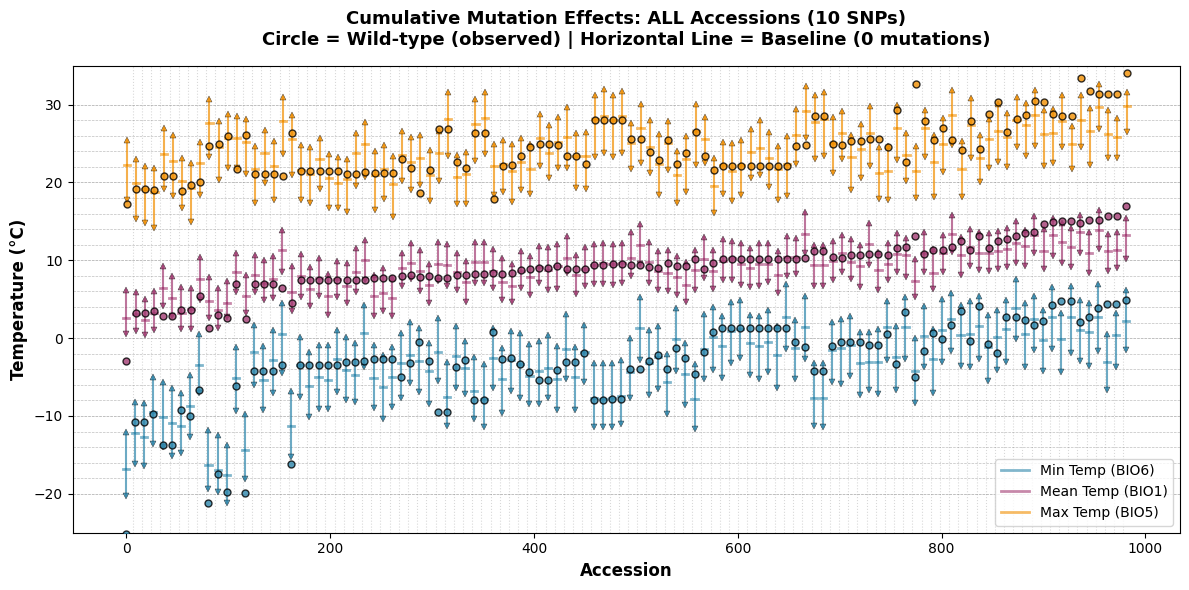

In [161]:
# ============================================================================
# PLOT TRAJECTORIES FOR AVERAGE ACCESSIONS
# ============================================================================

fig, ax = plot_mutation_trajectories(
    trajectory_data=trajectory_data_avg,
    snp_counts=SNP_COUNTS_AVG,
    group_name="ALL",
    max_snps_display=10,
    draw_vertical_steps=False,
    show_only_final=True,
    y_lim=(-25, 35),
    figsize=(12, 6),
    accession_order=ACCESSION_ORDER_ALL
)

if fig is not None:
    out_path = 'fig_mutation_trajectory_average_all_step.png'
    plt.savefig(out_path, dpi=300, bbox_inches='tight')
    print(f"\nSaved figure: {out_path}")
    plt.show()
else:
    print("Failed to create plot.")

In [150]:
bottom_10_accessions = ACCESSION_ORDER_ALL[:10]
top_10_accessions = ACCESSION_ORDER_ALL[-10:]
middle_accessions = ACCESSION_ORDER_ALL[len(ACCESSION_ORDER_ALL)//2 - 5 : len(ACCESSION_ORDER_ALL)//2 + 5]

bottom_10_trajectory_data = [item for item in trajectory_data_avg if item['accession'] in bottom_10_accessions]
bottom_10_order = ACCESSION_ORDER_ALL[:10]
top_10_trajectory_data = [item for item in trajectory_data_avg if item['accession'] in top_10_accessions]
top_10_order = ACCESSION_ORDER_ALL[-10:]
middle_10_trajectory_data = [item for item in trajectory_data_avg if item['accession'] in middle_accessions]
middle_10_order = middle_accessions

Saved figure: fig_mutation_trajectory_average_accessions_step.png


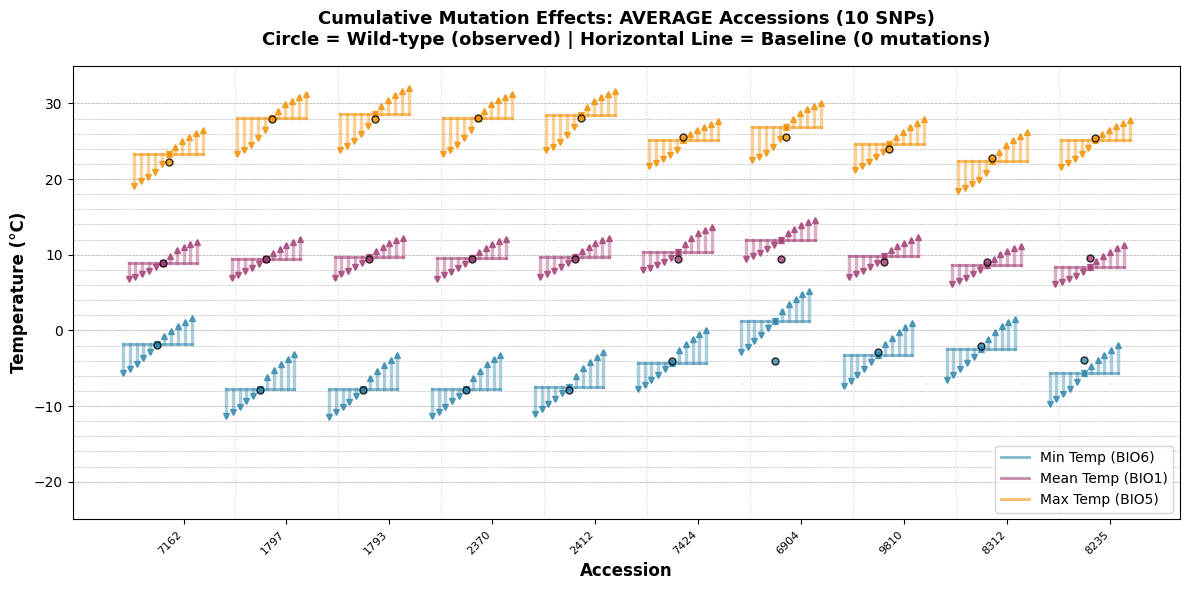

In [155]:
# ============================================================================
# PLOT MIDDLE ACCESSIONS - SINGLE ARROW MODE (show_only_final=True)
# ============================================================================

fig, ax = plot_mutation_trajectories(
    trajectory_data=middle_10_trajectory_data,
    snp_counts=SNP_COUNTS_AVG,
    group_name="AVERAGE",
    max_snps_display=10,
    draw_vertical_steps=True,  # Not relevant when show_only_final=True
    show_only_final=False,  # Only show single arrow to final mutation count
    y_lim=(-25, 35),
    figsize=(12, 6),
    accession_order=middle_10_order
)

# Save figure
out_path = "fig_mutation_trajectory_average_accessions_step.png"
if fig is not None:
    fig.savefig(out_path, dpi=300, bbox_inches='tight')
    print(f"Saved figure: {out_path}")
else:
    print("ERROR: Figure could not be created.")

Saved figure: fig_mutation_trajectory_bottom_top_comparison.png


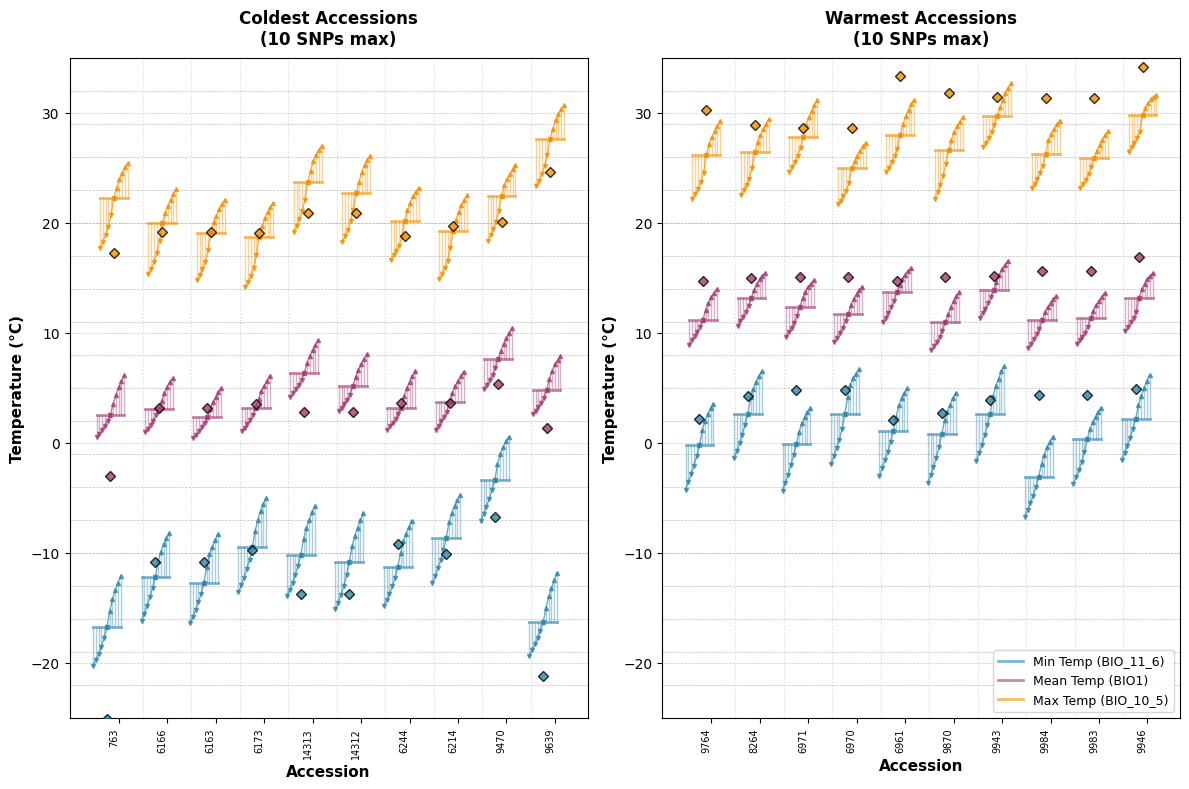

In [66]:
# ============================================================================
# PLOT BOTTOM AND TOP ACCESSIONS - SIDE BY SIDE
# ============================================================================

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Plot BOTTOM (coldest) accessions on left subplot
# Manually replicate plot_mutation_trajectories logic for ax1
accessions_bottom = bottom_10_order
n_accs = len(accessions_bottom)

# Spacing parameters
acc_spacing = 7.0
var_spacing = 0.5
step_width = 0.40
var_order = ['BIO_11_6', 'BIO1', 'BIO_10_5']
var_positions = [-var_spacing, 0, var_spacing]

x_positions = []
x_labels = []

max_offset = max(SNP_COUNTS_AVG)
snp_to_offset = {0: 0}
for idx, snp in enumerate(sorted(SNP_COUNTS_AVG), 1):
    snp_to_offset[snp] = idx

for i, acc in enumerate(accessions_bottom):
    base_x = i * acc_spacing
    acc_data = [item for item in bottom_10_trajectory_data if item['accession'] == acc]
    
    for j, var_name in enumerate(var_order):
        var_items = [item for item in acc_data if item['variable'] == var_name]
        if not var_items:
            continue
        
        item = var_items[0]
        color = item['color']
        label = item['label']
        x_var_base = base_x + var_positions[j]
        
        # Plot wild-type marker
        ax1.plot(x_var_base, item['wt'], marker='D', markersize=5, 
               color=color, markeredgecolor='black', markeredgewidth=1.0,
               zorder=15, alpha=0.8)
        
        # Plot baseline as horizontal line
        baseline_x_left = x_var_base - snp_to_offset[max_offset] * step_width
        baseline_x_right = x_var_base + snp_to_offset[max_offset] * step_width
        ax1.plot([baseline_x_left, baseline_x_right], [item['baseline'], item['baseline']], 
               color=color, linestyle='-', linewidth=2.0, alpha=0.6,
               zorder=4, label=label if i == 0 else "")
        
        # Plot negative mutations trajectory
        neg_snps = item['neg_trajectory']['snp_count']
        neg_temps = item['neg_trajectory']['temperature']
        x_neg = [x_var_base - snp_to_offset[snp] * step_width for snp in neg_snps]
        
        for k in range(len(neg_snps)):
            ax1.plot([x_neg[k], x_neg[k]], [neg_temps[k], item['baseline']], 
                   color=color, linestyle='-', linewidth=1.0, alpha=0.4, zorder=3)
        
        ax1.plot(x_neg, neg_temps, marker='v', markersize=3,
               color=color, linestyle='-', linewidth=1, alpha=0.7, zorder=5)
        
        # Plot positive mutations trajectory
        pos_snps = item['pos_trajectory']['snp_count']
        pos_temps = item['pos_trajectory']['temperature']
        x_pos = [x_var_base + snp_to_offset[snp] * step_width for snp in pos_snps]
        
        for k in range(len(pos_snps)):
            ax1.plot([x_pos[k], x_pos[k]], [item['baseline'], pos_temps[k]], 
                   color=color, linestyle='-', linewidth=1.0, alpha=0.4, zorder=3)
        
        ax1.plot(x_pos, pos_temps, marker='^', markersize=3,
               color=color, linestyle='-', linewidth=1, alpha=0.7, zorder=5)
    
    x_positions.append(base_x + 3 * step_width)
    x_labels.append(str(acc))

# Formatting for ax1 (BOTTOM)
ax1.set_xlabel('Accession', fontsize=11, fontweight='bold')
ax1.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold')
ax1.set_title(f'Coldest Accessions\n(10 SNPs max)', fontsize=12, fontweight='bold', pad=10)
ax1.set_xticks(x_positions)
ax1.set_xticklabels(x_labels, rotation=90, ha='right', fontsize=7)
ax1.set_ylim(-25, 35)

# Temperature reference lines
for temp in range(-25, 40, 3):
    ax1.axhline(temp, color='gray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=1)

ax1.grid(True, axis='y', alpha=0.7, linestyle='--', linewidth=0.5)
# ax1.legend(loc='lower right', frameon=True, fontsize=9, ncol=1)

# Vertical separators
for i in range(1, n_accs):
    sep_x = (x_positions[i-1] + x_positions[i]) / 2
    ax1.axvline(sep_x, color='gray', linestyle=':', alpha=0.3, linewidth=0.8)

# -------- Plot TOP accessions on right subplot --------
accessions_top = top_10_order
n_accs = len(accessions_top)

x_positions = []
x_labels = []

for i, acc in enumerate(accessions_top):
    base_x = i * acc_spacing
    acc_data = [item for item in top_10_trajectory_data if item['accession'] == acc]
    
    for j, var_name in enumerate(var_order):
        var_items = [item for item in acc_data if item['variable'] == var_name]
        if not var_items:
            continue
        
        item = var_items[0]
        color = item['color']
        label = item['label']
        x_var_base = base_x + var_positions[j]
        
        # Plot wild-type marker
        ax2.plot(x_var_base, item['wt'], marker='D', markersize=5, 
               color=color, markeredgecolor='black', markeredgewidth=1.0,
               zorder=15, alpha=0.8)
        
        # Plot baseline as horizontal line
        baseline_x_left = x_var_base - snp_to_offset[max_offset] * step_width
        baseline_x_right = x_var_base + snp_to_offset[max_offset] * step_width
        ax2.plot([baseline_x_left, baseline_x_right], [item['baseline'], item['baseline']], 
               color=color, linestyle='-', linewidth=2.0, alpha=0.6,
               zorder=4, label=label if i == 0 else "")
        
        # Plot negative mutations trajectory
        neg_snps = item['neg_trajectory']['snp_count']
        neg_temps = item['neg_trajectory']['temperature']
        x_neg = [x_var_base - snp_to_offset[snp] * step_width for snp in neg_snps]
        
        for k in range(len(neg_snps)):
            ax2.plot([x_neg[k], x_neg[k]], [neg_temps[k], item['baseline']], 
                   color=color, linestyle='-', linewidth=1.0, alpha=0.4, zorder=3)
        
        ax2.plot(x_neg, neg_temps, marker='v', markersize=3,
               color=color, linestyle='-', linewidth=1, alpha=0.7, zorder=5)
        
        # Plot positive mutations trajectory
        pos_snps = item['pos_trajectory']['snp_count']
        pos_temps = item['pos_trajectory']['temperature']
        x_pos = [x_var_base + snp_to_offset[snp] * step_width for snp in pos_snps]
        
        for k in range(len(pos_snps)):
            ax2.plot([x_pos[k], x_pos[k]], [item['baseline'], pos_temps[k]], 
                   color=color, linestyle='-', linewidth=1.0, alpha=0.4, zorder=3)
        
        ax2.plot(x_pos, pos_temps, marker='^', markersize=3,
               color=color, linestyle='-', linewidth=1, alpha=0.7, zorder=5)
    
    x_positions.append(base_x + 3 * step_width)
    x_labels.append(str(acc))

# Formatting for ax2 (TOP)
ax2.set_xlabel('Accession', fontsize=11, fontweight='bold')
ax2.set_ylabel('Temperature (°C)', fontsize=11, fontweight='bold')
ax2.set_title(f'Warmest Accessions\n(10 SNPs max)', fontsize=12, fontweight='bold', pad=10)
ax2.set_xticks(x_positions)
ax2.set_xticklabels(x_labels, rotation=90, ha='right', fontsize=7)
ax2.set_ylim(-25, 35)

# Temperature reference lines
for temp in range(-25, 40, 3):
    ax2.axhline(temp, color='gray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=1)

ax2.grid(True, axis='y', alpha=0.7, linestyle='--', linewidth=0.5)
ax2.legend(loc='lower right', frameon=True, fontsize=9, ncol=1)

# Vertical separators
for i in range(1, n_accs):
    sep_x = (x_positions[i-1] + x_positions[i]) / 2
    ax2.axvline(sep_x, color='gray', linestyle=':', alpha=0.3, linewidth=0.8)

plt.tight_layout()

# Save figure
out_path = "fig_mutation_trajectory_bottom_top_comparison.png"
fig.savefig(out_path, dpi=300, bbox_inches='tight')
print(f"Saved figure: {out_path}")
plt.show()

In [91]:
# ============================================================================
# LOAD TRAJECTORIES FOR BOTTOM (COLDEST) ACCESSIONS
# ============================================================================

BASE_DIR_NEG_BOTTOM = "D:\\Masters\\Results\\Mutations\\Analysis\\BottomNeg"
BASE_DIR_POS_BOTTOM = "D:\\Masters\\Results\\Mutations\\Analysis\\BottomPos"
SNP_COUNTS_BOTTOM = [2, 3, 4, 6, 8, 10]

trajectory_data_bottom = load_mutation_trajectories(
    base_dir_neg=BASE_DIR_NEG_BOTTOM,
    base_dir_pos=BASE_DIR_POS_BOTTOM,
    dataset_norm=dataset_norm,
    temp_vars=TEMP_VARS,
    snp_counts=SNP_COUNTS_BOTTOM,
    group_name="BOTTOM (Coldest)"
)

print("Ready to plot!")

Loading cumulative mutation trajectories for BOTTOM (Coldest) accessions...
Found 10 accessions: [np.int64(763), np.int64(6163), np.int64(6166), np.int64(6173), np.int64(6214), np.int64(6244), np.int64(9470), np.int64(9639), np.int64(14312), np.int64(14313)]
Loaded trajectories for 30 accession-variable combinations
Ready to plot!


In [ ]:
# ============================================================================
# BUILD ACCESSION ORDER FROM RANKS (for BOTTOM trajectories)
# ============================================================================

_present_bottom = sorted({item['accession'] for item in trajectory_data_bottom})
try:
    ORDER_BOTTOM = build_accession_order_from_rank(rank_df_sorted, _present_bottom)
except NameError:
    ORDER_BOTTOM = sorted(_present_bottom)

print('Accession order (BOTTOM):', ORDER_BOTTOM)


Saved figure: fig_mutation_trajectory_bottom_accessions_step.png


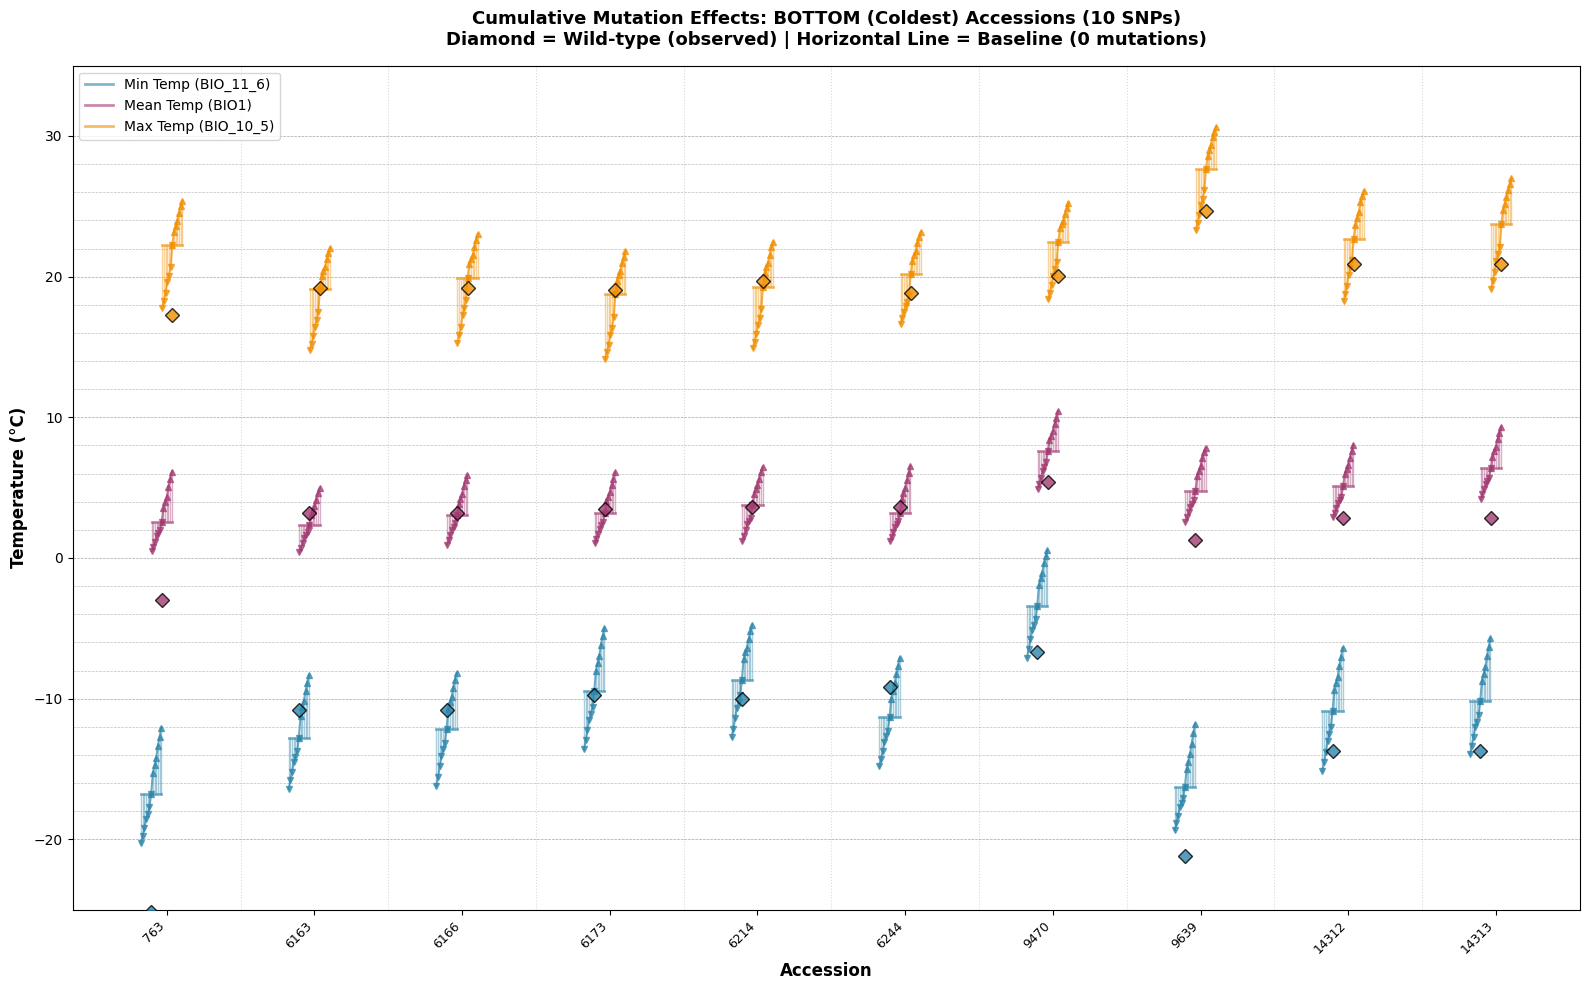

In [ ]:
# ============================================================================
# PLOT TRAJECTORIES FOR BOTTOM (COLDEST) ACCESSIONS
# ============================================================================

fig, ax = plot_mutation_trajectories(
    trajectory_data=trajectory_data_bottom,
    snp_counts=SNP_COUNTS_BOTTOM,
    group_name="BOTTOM (Coldest)",
    max_snps_display=10,
    draw_vertical_steps=True,
    y_lim=(-25, 35),
    figsize=(16, 10),
    accession_order=ORDER_BOTTOM
)

if fig is not None:
    out_path = 'fig_mutation_trajectory_bottom_accessions_step.png'
    plt.savefig(out_path, dpi=300, bbox_inches='tight')
    print(f"\nSaved figure: {out_path}")
    plt.show()
else:
    print("Failed to create plot.")

In [93]:
# ============================================================================
# LOAD TRAJECTORIES FOR TOP (WARMEST) ACCESSIONS
# ============================================================================

BASE_DIR_NEG_TOP = "D:\\Masters\\Results\\Mutations\\Analysis\\TopNeg"
BASE_DIR_POS_TOP = "D:\\Masters\\Results\\Mutations\\Analysis\\TopPos"
SNP_COUNTS_TOP = [2, 3, 4, 6, 8]  # Top has max 8 SNPs

trajectory_data_top = load_mutation_trajectories(
    base_dir_neg=BASE_DIR_NEG_TOP,
    base_dir_pos=BASE_DIR_POS_TOP,
    dataset_norm=dataset_norm,
    temp_vars=TEMP_VARS,
    snp_counts=SNP_COUNTS_TOP,
    group_name="TOP (Warmest)"
)

print("Ready to plot!")

Loading cumulative mutation trajectories for TOP (Warmest) accessions...
Found 10 accessions: [np.int64(6961), np.int64(6970), np.int64(6971), np.int64(8264), np.int64(9764), np.int64(9870), np.int64(9943), np.int64(9946), np.int64(9983), np.int64(9984)]
Loaded trajectories for 30 accession-variable combinations
Ready to plot!


In [ ]:
# ============================================================================
# BUILD ACCESSION ORDER FROM RANKS (for TOP trajectories)
# ============================================================================

_present_top = sorted({item['accession'] for item in trajectory_data_top})
try:
    ORDER_TOP = build_accession_order_from_rank(rank_df_sorted, _present_top)
except NameError:
    ORDER_TOP = sorted(_present_top)

print('Accession order (TOP):', ORDER_TOP)

In [37]:
# ============================================================================
# PLOT TRAJECTORIES FOR TOP (WARMEST) ACCESSIONS
# ============================================================================

fig, ax = plot_mutation_trajectories(
    trajectory_data=trajectory_data_top,
    snp_counts=SNP_COUNTS_TOP,
    group_name="TOP (Warmest)",
    max_snps_display=8,
    draw_vertical_steps=True,
    y_lim=(-25, 35),
    figsize=(6, 8),
    accession_order=ORDER_TOP
)

if fig is not None:
    out_path = 'fig_mutation_trajectory_top_accessions_step.png'
    plt.savefig(out_path, dpi=300, bbox_inches='tight')
    print(f"\nSaved figure: {out_path}")
    plt.show()
else:
    print("Failed to create plot.")

NameError: name 'trajectory_data_top' is not defined

## Mutation Effect Magnitude Analysis

Analyze the magnitude of temperature shifts induced by mutations across all variables and directions.

For each variable and direction, we examine:
1. **Largest single SNP effect** - Maximum absolute temperature change from a single mutation
2. **Largest combo SNP effect** - Maximum absolute temperature change from a combination mutation
3. **Comparison across SNP counts** - How effects scale from 1 SNP to 10 SNPs

This helps us understand:
- Which mutation types (single vs combo) produce stronger effects
- How mutation effects accumulate with more SNPs
- Which variables are most/least responsive to mutations

In [130]:
def analyze_mutation_magnitudes(base_dir, var_name, snp_counts, direction_name, temp_std):
    """
    Analyze the magnitude of temperature shifts induced by mutations.
    
    Parameters:
    -----------
    base_dir : str
        Path to mutation directory
    var_name : str
        Temperature variable name
    snp_counts : list
        List of SNP counts to analyze (e.g., [2, 4, 6, 8, 10])
    direction_name : str
        'Negative' or 'Positive'
    temp_std : float
        Standard deviation of temperature variable (for denormalization)
    
    Returns:
    --------
    dict : Analysis results with largest single/combo effects for each SNP count
    """
    
    print(f"\nAnalyzing mutation magnitudes for {var_name} - {direction_name}...")
    
    results = {
        'variable': var_name,
        'direction': direction_name,
        'by_snp_count': {}
    }
    
    for n_snps in snp_counts:
        # Load single mutations from per_accession_cumulative_variants.csv
        singles_path = os.path.join(base_dir, var_name, str(n_snps), "per_accession_cumulative_variants.csv")
        singles = pd.DataFrame()
        
        if os.path.exists(singles_path):
            singles_df = pd.read_csv(singles_path)
            # For >1 SNP, only look at the last step (n_snps)
            # For 1 SNP, step will be 1
            singles = singles_df[singles_df['step'] == n_snps].copy()
            # Convert normalized deltas to true temperature shifts
            singles['temp_shift'] = singles['cumulative_delta'].abs() * temp_std
        else:
            print(f"  Singles file not found: {singles_path}")
        
        # Load combo mutations from per_accession_cumulative_combo_variants.csv
        combos_path = os.path.join(base_dir, var_name, str(n_snps), "per_accession_cumulative_combo_variants.csv")
        combos = pd.DataFrame()
        
        if os.path.exists(combos_path):
            combo_df = pd.read_csv(combos_path)
            # Only keep combo type (not singles which might be duplicated)
            combos_all = combo_df[combo_df['variant_type'] == 'combo'].copy()
            # For >1 SNP, only look at the last step (n_snps)
            combos = combos_all[combos_all['step'] == n_snps].copy()
            # Convert normalized deltas to true temperature shifts
            combos['temp_shift'] = combos['cumulative_delta'].abs() * temp_std
        else:
            print(f"  Combos file not found: {combos_path}")
        
        if singles.empty and combos.empty:
            print(f"  No data found for {n_snps} SNPs")
            continue
        
        # Find largest effects
        snp_result = {
            'n_snps': n_snps,
            'n_total_mutations': len(singles) + len(combos),
            'n_singles': len(singles),
            'n_combos': len(combos)
        }
        
        # Largest single mutation effect
        if not singles.empty:
            max_single_idx = singles['temp_shift'].idxmax()
            max_single = singles.loc[max_single_idx]
            snp_result['largest_single'] = {
                'accession': int(max_single['accession']),
                'step': int(max_single['step']),
                'temp_shift': float(max_single['temp_shift']),
                'position': str(max_single['position']),  # Note: 'position' not 'positions'
                'ref_base': str(max_single['ref_base']),  # Note: 'ref_base' not 'ref_bases'
                'alt_base': str(max_single['alt_base']),  # Note: 'alt_base' not 'alt_bases'
                'snp_index': int(max_single['snp_index'])
            }
        else:
            snp_result['largest_single'] = None
        
        # Largest combo mutation effect
        if not combos.empty:
            max_combo_idx = combos['temp_shift'].idxmax()
            max_combo = combos.loc[max_combo_idx]
            snp_result['largest_combo'] = {
                'accession': int(max_combo['accession']),
                'step': int(max_combo['step']),
                'temp_shift': float(max_combo['temp_shift']),
                'positions': str(max_combo['positions']),
                'size': int(max_combo['size']),
                'snp_index': int(max_combo['snp_index'])
            }
            
            # Also get mean combo effect for comparison
            snp_result['mean_combo_shift'] = float(combos['temp_shift'].mean())
            snp_result['median_combo_shift'] = float(combos['temp_shift'].median())
        else:
            snp_result['largest_combo'] = None
            snp_result['mean_combo_shift'] = None
            snp_result['median_combo_shift'] = None
        
        # Overall statistics
        if not singles.empty:
            snp_result['mean_single_shift'] = float(singles['temp_shift'].mean())
            snp_result['median_single_shift'] = float(singles['temp_shift'].median())
        else:
            snp_result['mean_single_shift'] = None
            snp_result['median_single_shift'] = None
        
        results['by_snp_count'][n_snps] = snp_result
        
        print(f"  {n_snps} SNPs: {len(singles)} singles, {len(combos)} combos")
        if snp_result['largest_single']:
            print(f"    Largest single: {snp_result['largest_single']['temp_shift']:.3f}°C")
        if snp_result['largest_combo']:
            print(f"    Largest combo: {snp_result['largest_combo']['temp_shift']:.3f}°C")
    
    return results


def summarize_magnitude_analysis(magnitude_results_list):
    """
    Create a summary table from magnitude analysis results.
    
    Parameters:
    -----------
    magnitude_results_list : list
        List of results dictionaries from analyze_mutation_magnitudes
    
    Returns:
    --------
    DataFrame : Summary table with columns for each variable/direction/SNP count
    """
    
    summary_rows = []
    
    for result in magnitude_results_list:
        var_name = result['variable']
        direction = result['direction']
        
        for n_snps, data in result['by_snp_count'].items():
            row = {
                'Variable': var_name,
                'Direction': direction,
                'SNP_Count': n_snps,
                'N_Singles': data['n_singles'],
                'N_Combos': data['n_combos'],
                'Largest_Single_Shift': data['largest_single']['temp_shift'] if data['largest_single'] else None,
                'Mean_Single_Shift': data['mean_single_shift'],
                'Largest_Combo_Shift': data['largest_combo']['temp_shift'] if data['largest_combo'] else None,
                'Mean_Combo_Shift': data['mean_combo_shift'],
                'Median_Combo_Shift': data['median_combo_shift']
            }
            
            # Add details about largest mutations
            if data['largest_single']:
                row['Largest_Single_Accession'] = data['largest_single']['accession']
                row['Largest_Single_Position'] = data['largest_single']['position']
            
            if data['largest_combo']:
                row['Largest_Combo_Accession'] = data['largest_combo']['accession']
                row['Largest_Combo_Size'] = data['largest_combo']['size']
                row['Largest_Combo_Positions'] = data['largest_combo']['positions']
            
            summary_rows.append(row)
    
    df = pd.DataFrame(summary_rows)
    
    # Sort by variable, direction, SNP count
    df = df.sort_values(['Variable', 'Direction', 'SNP_Count']).reset_index(drop=True)
    
    return df

print("Mutation magnitude analysis functions defined!")

Mutation magnitude analysis functions defined!


In [131]:
# ============================================================================
# ANALYZE MUTATION MAGNITUDES FOR ALL VARIABLES AND DIRECTIONS
# ============================================================================

# Analyze for all combinations of variables and directions
all_magnitude_results = []

# Variables to analyze
variables_to_analyze = ['BIO1', 'BIO_11_6', 'BIO_10_5']
SNP_COUNTS = [1, 10]

for var_name in variables_to_analyze:
    if var_name not in TEMP_VARS:
        print(f"Skipping {var_name} - not in TEMP_VARS")
        continue
    
    temp_std = TEMP_VARS[var_name]['std']
    
    # Negative mutations (cooling)
    neg_result = analyze_mutation_magnitudes(
        base_dir=BASE_DIR_NEG_AVG,
        var_name=var_name,
        snp_counts=SNP_COUNTS,
        direction_name='Negative',
        temp_std=temp_std
    )
    all_magnitude_results.append(neg_result)
    
    # Positive mutations (warming)
    pos_result = analyze_mutation_magnitudes(
        base_dir=BASE_DIR_POS_AVG,
        var_name=var_name,
        snp_counts=SNP_COUNTS,
        direction_name='Positive',
        temp_std=temp_std
    )
    all_magnitude_results.append(pos_result)

print("\n" + "="*80)
print("MAGNITUDE ANALYSIS COMPLETE")
print("="*80)


Analyzing mutation magnitudes for BIO1 - Negative...
  1 SNPs: 110 singles, 110 combos
    Largest single: 0.919°C
    Largest combo: 1.355°C
  10 SNPs: 110 singles, 107 combos
    Largest single: 3.040°C
    Largest combo: 6.479°C

Analyzing mutation magnitudes for BIO1 - Positive...
  1 SNPs: 110 singles, 110 combos
    Largest single: 0.655°C
    Largest combo: 0.920°C
  10 SNPs: 110 singles, 109 combos
    Largest single: 3.585°C
    Largest combo: 5.155°C

Analyzing mutation magnitudes for BIO_11_6 - Negative...
  1 SNPs: 110 singles, 110 combos
    Largest single: 0.816°C
    Largest combo: 1.314°C
  10 SNPs: 110 singles, 110 combos
    Largest single: 5.028°C
    Largest combo: 7.173°C

Analyzing mutation magnitudes for BIO_11_6 - Positive...
  1 SNPs: 110 singles, 106 combos
    Largest single: 0.894°C
    Largest combo: 1.670°C
  10 SNPs: 110 singles, 110 combos
    Largest single: 4.703°C
    Largest combo: 6.926°C

Analyzing mutation magnitudes for BIO_10_5 - Negative...
  

In [125]:
# ============================================================================
# CREATE SUMMARY TABLE
# ============================================================================

magnitude_summary = summarize_magnitude_analysis(all_magnitude_results)

print("\n" + "="*80)
print("MUTATION MAGNITUDE SUMMARY - ALL VARIABLES")
print("="*80)
print("\nKey metrics:")
print("- Largest_Single_Shift: Maximum temperature change from any single mutation")
print("- Largest_Combo_Shift: Maximum temperature change from any combo mutation")
print("- Mean shifts show typical effect sizes")
print("\n")

# Display summary for comparison across SNP counts
print("="*80)
print("COMPARISON: 2 SNPs vs 10 SNPs")
print("="*80)

for var_name in variables_to_analyze:
    if var_name not in TEMP_VARS:
        continue
    
    print(f"\n{TEMP_VARS[var_name]['label']}:")
    print("-" * 60)
    
    for direction in ['Negative', 'Positive']:
        subset = magnitude_summary[
            (magnitude_summary['Variable'] == var_name) & 
            (magnitude_summary['Direction'] == direction) &
            (magnitude_summary['SNP_Count'].isin([2, 10]))
        ]
        
        if subset.empty:
            continue
        
        print(f"\n  {direction} mutations:")
        
        for _, row in subset.iterrows():
            n_snps = int(row['SNP_Count'])
            print(f"    {n_snps} SNPs:")
            
            if pd.notna(row['Largest_Single_Shift']):
                print(f"      Single: {row['Largest_Single_Shift']:.3f}°C (max), {row['Mean_Single_Shift']:.3f}°C (mean)")
            else:
                print(f"      Single: None found")
            
            if pd.notna(row['Largest_Combo_Shift']):
                print(f"      Combo:  {row['Largest_Combo_Shift']:.3f}°C (max), {row['Mean_Combo_Shift']:.3f}°C (mean)")
            else:
                print(f"      Combo:  None found")

# Show full detailed table
print("\n" + "="*80)
print("FULL DETAILED TABLE")
print("="*80)
display_cols = [
    'Variable', 'Direction', 'SNP_Count',
    'Largest_Single_Shift', 'Mean_Single_Shift',
    'Largest_Combo_Shift', 'Mean_Combo_Shift'
]
print(magnitude_summary[display_cols].to_string(index=False))


MUTATION MAGNITUDE SUMMARY - ALL VARIABLES

Key metrics:
- Largest_Single_Shift: Maximum temperature change from any single mutation
- Largest_Combo_Shift: Maximum temperature change from any combo mutation
- Mean shifts show typical effect sizes


COMPARISON: 2 SNPs vs 10 SNPs

Mean Temp (BIO1):
------------------------------------------------------------

  Negative mutations:
    10 SNPs:
      Single: 0.224°C (max), 0.179°C (mean)
      Combo:  0.386°C (max), 0.304°C (mean)

  Positive mutations:
    10 SNPs:
      Single: 0.249°C (max), 0.164°C (mean)
      Combo:  0.372°C (max), 0.279°C (mean)

Min Temp (BIO_11_6):
------------------------------------------------------------

  Negative mutations:
    10 SNPs:
      Single: 0.372°C (max), 0.314°C (mean)
      Combo:  0.647°C (max), 0.476°C (mean)

  Positive mutations:
    10 SNPs:
      Single: 0.326°C (max), 0.245°C (mean)
      Combo:  0.550°C (max), 0.429°C (mean)

Max Temp (BIO_10_5):
---------------------------------------

## SNP Analysis Across Accessions

Analyze common SNPs across accessions for each variable and direction (positive/negative mutations):
1. **Find common SNPs** - Identify SNPs that appear across multiple accessions
2. **Average rank/step** - Calculate at which step (on average) each SNP appears
3. **Position analysis** - Examine the genomic positions being mutated for each SNP
4. **Combination analysis** - Look at SNP combinations (for combo variants)

In [108]:
def load_snp_details(base_dir, var_name, n_snps):
    """
    Load SNP details from per_accession_cumulative_combo_variants.csv
    
    This file contains both single and combo mutations with:
    - variant_type: 'single' or 'combo'
    - For singles: snp_index, positions (single value), ref_bases, alt_bases
    - For combos: snp_index, positions (semicolon-separated), ref_bases, alt_bases, size
    
    Returns DataFrame with columns: accession, step, variant_type, snp_index, positions, etc.
    """
    path = os.path.join(base_dir, var_name, str(n_snps), "per_accession_cumulative_combo_variants.csv")
    if not os.path.exists(path):
        print(f"  File not found: {path}")
        return pd.DataFrame()
    
    df = pd.read_csv(path)
    print(f"  Loaded {len(df)} records from {var_name}/{n_snps}")
    return df


def analyze_common_snps(base_dir, var_name, snp_counts, direction_name):
    """
    Analyze common SNPs across accessions for a specific variable and direction.
    
    Parameters:
    -----------
    base_dir : str
        Path to mutation directory (e.g., AnalysisAll/Negative)
    var_name : str
        Temperature variable name (e.g., 'BIO1')
    snp_counts : list
        List of SNP counts to analyze (max steps to include)
    direction_name : str
        'Negative' or 'Positive'
    
    Returns:
    --------
    dict : Analysis results containing:
        - single_snps: DataFrame with single mutation analysis
        - combo_snps: DataFrame with combo mutation analysis
        - all_snps: Combined DataFrame
        - snp_position_breakdown: DataFrame showing which positions each snp_index uses
    """
    
    print(f"\nAnalyzing {direction_name} mutations for {var_name}...")
    
    # Collect all SNPs across all max step values
    snp_data = []
    
    for n_snps in snp_counts:
        df = load_snp_details(base_dir, var_name, n_snps)
        if df.empty:
            continue
        
        df['max_steps'] = n_snps  # Track which analysis this came from
        snp_data.append(df)
    
    if not snp_data:
        print(f"No SNP data found for {var_name} {direction_name}")
        return None
    
    # Combine all data
    all_snps = pd.concat(snp_data, ignore_index=True)
    print(f"Total records: {len(all_snps)}")
    print(f"Unique accessions: {all_snps['accession'].nunique()}")
    print(f"Variant types: {all_snps['variant_type'].value_counts().to_dict()}")
    
    # Separate single and combo mutations
    singles = all_snps[all_snps['variant_type'] == 'single'].copy()
    combos = all_snps[all_snps['variant_type'] == 'combo'].copy()
    
    results = {}
    
    # ========== Analyze Single Mutations ==========
    if not singles.empty:
        # For singles, positions is already a single value (not semicolon-separated)
        # Create SNP identifier
        singles['snp_id'] = singles.apply(
            lambda row: f"SNP{row['snp_index']}_{row['positions']}_{row['ref_bases']}>{row['alt_bases']}", 
            axis=1
        )
        
        # Frequency across accessions
        single_freq = singles.groupby('snp_id').agg({
            'accession': 'nunique',
            'step': ['mean', 'std', 'min', 'max', 'count'],
            'snp_index': 'first',
            'positions': 'first',  # Single position value
            'ref_bases': 'first',
            'alt_bases': 'first',
            'step_delta': ['mean', 'std']
        }).reset_index()
        
        single_freq.columns = [
            'snp_id', 'n_accessions', 'avg_step', 'std_step', 'min_step', 'max_step', 'total_occurrences',
            'snp_index', 'position', 'ref_base', 'alt_base', 'avg_delta', 'std_delta'
        ]
        single_freq = single_freq.sort_values('n_accessions', ascending=False)
        results['single_snps'] = single_freq
        
        print(f"\nSingle SNPs: {len(single_freq)} unique SNPs")
        print(f"Top 5 most common:")
        print(single_freq.head()[['snp_id', 'n_accessions', 'avg_step', 'avg_delta']])
    
    # ========== Analyze Combo Mutations ==========
    if not combos.empty:
        # Create combo identifier using snp_index and positions
        combos['combo_id'] = combos.apply(
            lambda row: f"COMBO{row['snp_index']}_{row['positions']}", 
            axis=1
        )
        
        # Frequency across accessions
        combo_freq = combos.groupby('combo_id').agg({
            'accession': 'nunique',
            'step': ['mean', 'std', 'min', 'max', 'count'],
            'snp_index': 'first',
            'positions': 'first',
            'ref_bases': 'first',
            'alt_bases': 'first',
            'size': 'first',
            'step_delta': ['mean', 'std']
        }).reset_index()
        
        combo_freq.columns = [
            'combo_id', 'n_accessions', 'avg_step', 'std_step', 'min_step', 'max_step', 'total_occurrences',
            'snp_index', 'positions', 'ref_bases', 'alt_bases', 'size', 'avg_delta', 'std_delta'
        ]
        combo_freq = combo_freq.sort_values('n_accessions', ascending=False)
        results['combo_snps'] = combo_freq
        
        print(f"\nCombo SNPs: {len(combo_freq)} unique combos")
        print(f"Top 5 most common:")
        print(combo_freq.head()[['combo_id', 'n_accessions', 'size', 'avg_step', 'avg_delta']])
    
    # ========== SNP Index Position Analysis ==========
    # For each snp_index, aggregate all positions used across all variants
    snp_position_data = []
    
    if not combos.empty:
        for snp_index in combos['snp_index'].unique():
            snp_rows = combos[combos['snp_index'] == snp_index]
            
            # Collect all positions used by this snp_index across all variants
            all_positions_for_snp = []
            for positions_str in snp_rows['positions'].unique():
                positions_list = positions_str.split(';')
                all_positions_for_snp.extend(positions_list)
            
            # Count frequency of each position for this snp_index
            from collections import Counter
            position_counts = Counter(all_positions_for_snp)
            
            # Get overall statistics for this snp_index
            n_accessions = snp_rows['accession'].nunique()
            total_occurrences = len(snp_rows)
            avg_step = snp_rows['step'].mean()
            avg_delta = snp_rows['step_delta'].mean()
            n_variants = snp_rows['combo_id'].nunique()  # How many different position combinations
            
            # Format positions with their frequencies
            positions_with_freq = ', '.join([f"{pos}({count})" for pos, count in sorted(position_counts.items(), key=lambda x: int(x[0]))])
            
            snp_position_data.append({
                'snp_index': snp_index,
                'n_accessions': n_accessions,
                'n_variants': n_variants,
                'total_occurrences': total_occurrences,
                'avg_step': avg_step,
                'avg_delta': avg_delta,
                'positions_with_freq': positions_with_freq,
                'unique_positions': len(position_counts),
                'most_common_positions': ', '.join([pos for pos, _ in position_counts.most_common(5)])
            })
    
    if snp_position_data:
        snp_pos_df = pd.DataFrame(snp_position_data)
        snp_pos_df = snp_pos_df.sort_values('n_accessions', ascending=False)
        results['snp_position_breakdown'] = snp_pos_df
        
        print(f"\nSNP Index Position Breakdown: {len(snp_pos_df)} unique snp_indices")
        print(f"Top 5 snp_indices with their position usage:")
        print(snp_pos_df.head()[['snp_index', 'n_accessions', 'n_variants', 'most_common_positions']])
    
    results['all_snps'] = all_snps
    results['variable'] = var_name
    results['direction'] = direction_name
    
    return results

print("SNP analysis functions defined!")


SNP analysis functions defined!


In [109]:
# ============================================================================
# ANALYZE COMMON SNPs FOR BIO1 - NEGATIVE MUTATIONS
# ============================================================================

bio1_neg_analysis = analyze_common_snps(
    base_dir=BASE_DIR_NEG_AVG,
    var_name='BIO1',
    snp_counts=SNP_COUNTS_AVG,
    direction_name='Negative (Cooling)'
)

if bio1_neg_analysis:
    print("\n" + "="*80)
    print("RESULTS FOR BIO1 NEGATIVE (COOLING) MUTATIONS")
    print("="*80)
    
    # Show combo SNPs
    if 'combo_snps' in bio1_neg_analysis and not bio1_neg_analysis['combo_snps'].empty:
        print("\nTOP 20 MOST COMMON COMBO MUTATIONS:")
        display_cols = ['combo_id', 'n_accessions', 'size', 'avg_step', 'avg_delta', 'total_occurrences']
        print(bio1_neg_analysis['combo_snps'].head(20)[display_cols].to_string(index=False))
    
    # Show single SNPs (if any)
    if 'single_snps' in bio1_neg_analysis and not bio1_neg_analysis['single_snps'].empty:
        print("\nSINGLE MUTATIONS:")
        display_cols = ['snp_id', 'n_accessions', 'avg_step', 'avg_delta', 'total_occurrences']
        print(bio1_neg_analysis['single_snps'].head(20)[display_cols].to_string(index=False))
    
    # Show SNP index position breakdown
    if 'snp_position_breakdown' in bio1_neg_analysis:
        print("\nTOP 20 SNP INDICES - POSITION USAGE:")
        print("(Shows which positions each snp_index uses across all its variants)")
        print("Format: position(frequency) - how many times that position appears")
        display_cols = ['snp_index', 'n_accessions', 'n_variants', 'unique_positions', 'avg_step', 'positions_with_freq']
        print(bio1_neg_analysis['snp_position_breakdown'].head(20)[display_cols].to_string(index=False))



Analyzing Negative (Cooling) mutations for BIO1...
  Loaded 220 records from BIO1/2
  Loaded 440 records from BIO1/4
  Loaded 660 records from BIO1/6
  Loaded 880 records from BIO1/8
  Loaded 1100 records from BIO1/10
Total records: 3300
Unique accessions: 110
Variant types: {'combo': 3296, 'single': 4}

Single SNPs: 2 unique SNPs
Top 5 most common:
          snp_id  n_accessions  avg_step  avg_delta
1  SNP96_262_T>A             3      10.0  -0.068521
0  SNP27_131_N>C             1       9.0  -0.079952

Combo SNPs: 172 unique combos
Top 5 most common:
                 combo_id  n_accessions  size  avg_step  avg_delta
24          COMBO16_2;1;3           107     3  2.815730  -0.248431
41   COMBO223_144;143;138            83     3  5.354701  -0.126680
100   COMBO303_386;391;16            82     3  1.585366  -0.331856
2     COMBO11_334;337;330            74     3  6.520468  -0.114091
70   COMBO267_489;398;397            61     3  7.100000  -0.109345

SNP Index Position Breakdown: 36 uniqu

In [111]:
# ============================================================================
# ANALYZE COMMON SNPs FOR BIO1 - POSITIVE MUTATIONS
# ============================================================================

bio1_pos_analysis = analyze_common_snps(
    base_dir=BASE_DIR_POS_AVG,
    var_name='BIO1',
    snp_counts=SNP_COUNTS_AVG,
    direction_name='Positive (Warming)'
)

if bio1_pos_analysis:
    print("\n" + "="*80)
    print("RESULTS FOR BIO1 POSITIVE (WARMING) MUTATIONS")
    print("="*80)
    
    # Show combo SNPs
    if 'combo_snps' in bio1_pos_analysis and not bio1_pos_analysis['combo_snps'].empty:
        print("\nTOP 20 MOST COMMON COMBO MUTATIONS:")
        display_cols = ['combo_id', 'n_accessions', 'size', 'avg_step', 'avg_delta', 'total_occurrences']
        print(bio1_pos_analysis['combo_snps'].head(20)[display_cols].to_string(index=False))
    
    # Show single SNPs (if any)
    if 'single_snps' in bio1_pos_analysis and not bio1_pos_analysis['single_snps'].empty:
        print("\nSINGLE MUTATIONS:")
        display_cols = ['snp_id', 'n_accessions', 'avg_step', 'avg_delta', 'total_occurrences']
        print(bio1_pos_analysis['single_snps'].head(20)[display_cols].to_string(index=False))
    
    # Show SNP index position breakdown
    if 'snp_position_breakdown' in bio1_pos_analysis:
        print("\nTOP 20 SNP INDICES - POSITION USAGE:")
        print("(Shows which positions each snp_index uses across all its variants)")
        print("Format: position(frequency) - how many times that position appears")
        display_cols = ['snp_index', 'n_accessions', 'n_variants', 'unique_positions', 'avg_step', 'positions_with_freq']
        print(bio1_pos_analysis['snp_position_breakdown'].head(20)[display_cols].to_string(index=False))



Analyzing Positive (Warming) mutations for BIO1...
  Loaded 220 records from BIO1/2
  Loaded 440 records from BIO1/4
  Loaded 660 records from BIO1/6
  Loaded 880 records from BIO1/8
  Loaded 1100 records from BIO1/10
Total records: 3300
Unique accessions: 110
Variant types: {'combo': 3294, 'single': 6}

Single SNPs: 3 unique SNPs
Top 5 most common:
           snp_id  n_accessions  avg_step  avg_delta
0  SNP118_197_C>G             1       3.0   0.153938
1  SNP315_256_A>T             1       9.0   0.080647
2  SNP417_251_G>C             1      10.0   0.057088

Combo SNPs: 168 unique combos
Top 5 most common:
                 combo_id  n_accessions  size  avg_step  avg_delta
85    COMBO303_386;385;16            88     3  4.339934   0.135040
65      COMBO290_10;12;11            81     3  5.434599   0.117373
93   COMBO311_330;323;320            81     3  1.984655   0.185084
135  COMBO452_304;292;302            79     3  1.416021   0.195550
13       COMBO146_150;160            74     2  7.4

In [ ]:
# ============================================================================
# VISUALIZE SNP FREQUENCY AND AVERAGE STEP
# ============================================================================

def plot_snp_analysis(analysis_results, var_name, direction_name, top_n=30):
    """
    Create visualization of SNP analysis results.
    """
    if not analysis_results:
        print("No analysis results to plot")
        return
    
    summary = analysis_results['summary']
    
    # Take top N most common SNPs
    top_snps = summary.head(top_n)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: SNP frequency (number of accessions)
    ax1 = axes[0]
    x_pos = range(len(top_snps))
    ax1.barh(x_pos, top_snps['n_accessions'], color='steelblue', alpha=0.7)
    ax1.set_yticks(x_pos)
    ax1.set_yticklabels(top_snps[analysis_results['snp_id_col']], fontsize=8)
    ax1.set_xlabel('Number of Accessions', fontsize=11, fontweight='bold')
    ax1.set_ylabel('SNP ID', fontsize=11, fontweight='bold')
    ax1.set_title(f'Top {top_n} Most Common SNPs\n{var_name} - {direction_name}', 
                  fontsize=12, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    ax1.invert_yaxis()
    
    # Plot 2: Average step where SNP appears
    ax2 = axes[1]
    colors = plt.cm.RdYlGn_r(top_snps['avg_step'] / top_snps['avg_step'].max())
    ax2.barh(x_pos, top_snps['avg_step'], color=colors, alpha=0.7)
    ax2.set_yticks(x_pos)
    ax2.set_yticklabels(top_snps[analysis_results['snp_id_col']], fontsize=8)
    ax2.set_xlabel('Average Step (SNP Count)', fontsize=11, fontweight='bold')
    ax2.set_title(f'Average Step When SNP Appears\n{var_name} - {direction_name}', 
                  fontsize=12, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    ax2.invert_yaxis()
    
    plt.tight_layout()
    
    # Save figure
    safe_direction = direction_name.replace(' ', '_').replace('(', '').replace(')', '')
    out_path = f'fig_snp_analysis_{var_name}_{safe_direction}.png'
    plt.savefig(out_path, dpi=300, bbox_inches='tight')
    print(f"\nSaved figure: {out_path}")
    plt.show()
    
    return fig, axes


# Plot for BIO1 Negative
if bio1_neg_analysis:
    plot_snp_analysis(bio1_neg_analysis, 'BIO1', 'Negative (Cooling)', top_n=30)

In [ ]:
# Plot for BIO1 Positive
if bio1_pos_analysis:
    plot_snp_analysis(bio1_pos_analysis, 'BIO1', 'Positive (Warming)', top_n=30)

### Analyze SNP Combinations

For SNPs that appear as combinations (e.g., multiple positions mutated together), analyze the co-occurrence patterns.

In [ ]:
def analyze_snp_combinations(analysis_results, top_n_snps=10):
    """
    Analyze co-occurrence of SNPs across accessions and steps.
    
    Identifies which SNPs tend to appear together.
    """
    if not analysis_results:
        return None
    
    all_snps = analysis_results['all_snps']
    snp_id_col = analysis_results['snp_id_col']
    summary = analysis_results['summary']
    
    # Get top N most common SNPs
    top_snps = summary.head(top_n_snps)[snp_id_col].tolist()
    
    print(f"Analyzing combinations among top {top_n_snps} SNPs...")
    
    # For each accession and step, get the set of SNPs
    accession_step_snps = all_snps.groupby(['accession', 'step'])[snp_id_col].apply(set).reset_index()
    accession_step_snps.columns = ['accession', 'step', 'snp_set']
    
    # Calculate co-occurrence matrix for top SNPs
    cooccurrence = pd.DataFrame(0, index=top_snps, columns=top_snps)
    
    for _, row in accession_step_snps.iterrows():
        snp_set = row['snp_set']
        # Check which top SNPs are in this set
        present_top_snps = [s for s in top_snps if s in snp_set]
        
        # Increment co-occurrence for all pairs
        for i, snp1 in enumerate(present_top_snps):
            for snp2 in present_top_snps[i:]:
                cooccurrence.loc[snp1, snp2] += 1
                if snp1 != snp2:
                    cooccurrence.loc[snp2, snp1] += 1
    
    return {
        'cooccurrence_matrix': cooccurrence,
        'top_snps': top_snps,
        'accession_step_snps': accession_step_snps
    }


def plot_cooccurrence_heatmap(combination_results, var_name, direction_name):
    """
    Plot heatmap of SNP co-occurrence.
    """
    if not combination_results:
        return
    
    cooccurrence = combination_results['cooccurrence_matrix']
    
    fig, ax = plt.subplots(figsize=(12, 10))
    
    im = ax.imshow(cooccurrence.values, cmap='YlOrRd', aspect='auto')
    
    # Set ticks and labels
    ax.set_xticks(range(len(cooccurrence.columns)))
    ax.set_yticks(range(len(cooccurrence.index)))
    ax.set_xticklabels(cooccurrence.columns, rotation=45, ha='right', fontsize=9)
    ax.set_yticklabels(cooccurrence.index, fontsize=9)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Co-occurrence Count', fontsize=11, fontweight='bold')
    
    # Add title
    ax.set_title(f'SNP Co-occurrence Heatmap\n{var_name} - {direction_name}', 
                 fontsize=13, fontweight='bold', pad=15)
    
    # Add text annotations
    for i in range(len(cooccurrence.index)):
        for j in range(len(cooccurrence.columns)):
            text = ax.text(j, i, int(cooccurrence.iloc[i, j]),
                          ha="center", va="center", color="black" if cooccurrence.iloc[i, j] < cooccurrence.values.max()/2 else "white",
                          fontsize=8)
    
    plt.tight_layout()
    
    # Save figure
    safe_direction = direction_name.replace(' ', '_').replace('(', '').replace(')', '')
    out_path = f'fig_snp_cooccurrence_{var_name}_{safe_direction}.png'
    plt.savefig(out_path, dpi=300, bbox_inches='tight')
    print(f"\nSaved figure: {out_path}")
    plt.show()
    
    return fig, ax


# Analyze combinations for BIO1 Negative
if bio1_neg_analysis:
    bio1_neg_combinations = analyze_snp_combinations(bio1_neg_analysis, top_n_snps=15)
    if bio1_neg_combinations:
        plot_cooccurrence_heatmap(bio1_neg_combinations, 'BIO1', 'Negative (Cooling)')

In [ ]:
# Analyze combinations for BIO1 Positive
if bio1_pos_analysis:
    bio1_pos_combinations = analyze_snp_combinations(bio1_pos_analysis, top_n_snps=15)
    if bio1_pos_combinations:
        plot_cooccurrence_heatmap(bio1_pos_combinations, 'BIO1', 'Positive (Warming)')

### Export Analysis Results

Save the SNP analysis results to CSV files for further examination.

In [ ]:
# Export SNP analysis results to CSV
if bio1_neg_analysis:
    bio1_neg_analysis['summary'].to_csv('snp_analysis_BIO1_negative.csv', index=False)
    print("Exported: snp_analysis_BIO1_negative.csv")

if bio1_pos_analysis:
    bio1_pos_analysis['summary'].to_csv('snp_analysis_BIO1_positive.csv', index=False)
    print("Exported: snp_analysis_BIO1_positive.csv")

# Export co-occurrence matrices
if bio1_neg_analysis and 'bio1_neg_combinations' in locals():
    bio1_neg_combinations['cooccurrence_matrix'].to_csv('snp_cooccurrence_BIO1_negative.csv')
    print("Exported: snp_cooccurrence_BIO1_negative.csv")

if bio1_pos_analysis and 'bio1_pos_combinations' in locals():
    bio1_pos_combinations['cooccurrence_matrix'].to_csv('snp_cooccurrence_BIO1_positive.csv')
    print("Exported: snp_cooccurrence_BIO1_positive.csv")

print("\nAll analysis results exported!")